In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
# dataScipy is my own library for data science, you can install it by writing "pip install dataScipy" in your terminal
# let me know if you have any issues with it, baktas19@ku.edu.tr
from dataScipy import DataScience as DS

### <span style="color:RED">QUESTION 1</span>

In [2]:
KENYANTEA = pd.read_csv("KenyanTeaPrice.csv", skiprows=1)

TEA_MONTHS = list(KENYANTEA["Month"])
TEA_PRICE = list(KENYANTEA["Index"])

### <span style="color:RED">1.a</span>

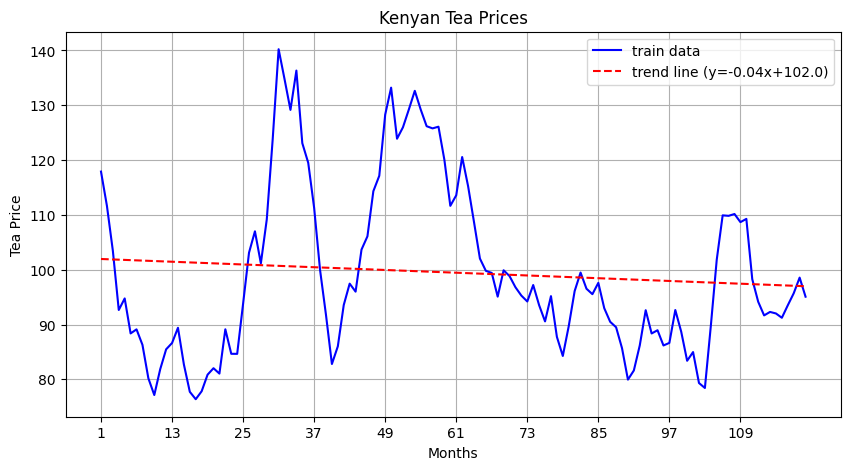

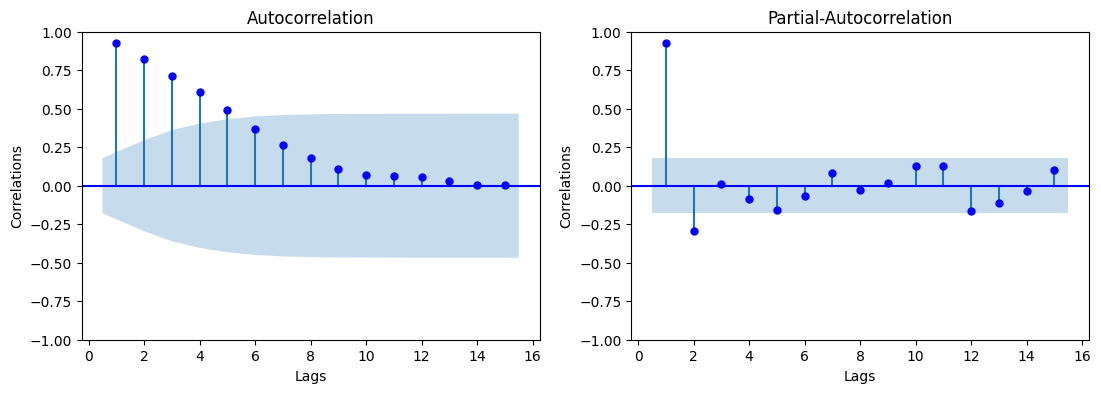

In [3]:
plt.figure(figsize=(10, 5))

z = np.polyfit(TEA_MONTHS, TEA_PRICE, 1)
p = np.poly1d(z)

plt.plot(TEA_MONTHS, TEA_PRICE, 'b', label='train data')
plt.plot(TEA_MONTHS, p(TEA_MONTHS), 'r--', label='trend line'+f' (y={round(z[0], 2)}x+{round(z[1], 2)})')
plt.xlabel('Months')
plt.ylabel('Tea Price')
plt.grid()
plt.xticks(range(min(TEA_MONTHS), max(TEA_MONTHS)+1, 12))
plt.title('Kenyan Tea Prices')
plt.legend()
plt.show()

DS.plot_PACF_ACF_together(TEA_PRICE, no_lags=15)

### <span style="color:RED">1.b</span>

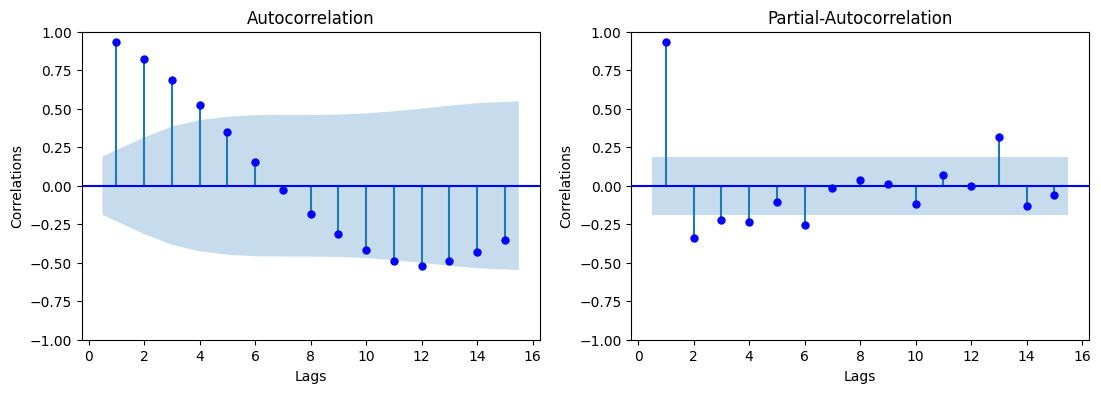

In [4]:
TEA_PRICE_DEASEASON = DS.deseasonalize_series(TEA_PRICE, 12)
DS.plot_PACF_ACF_together(TEA_PRICE_DEASEASON[13:], no_lags=15)

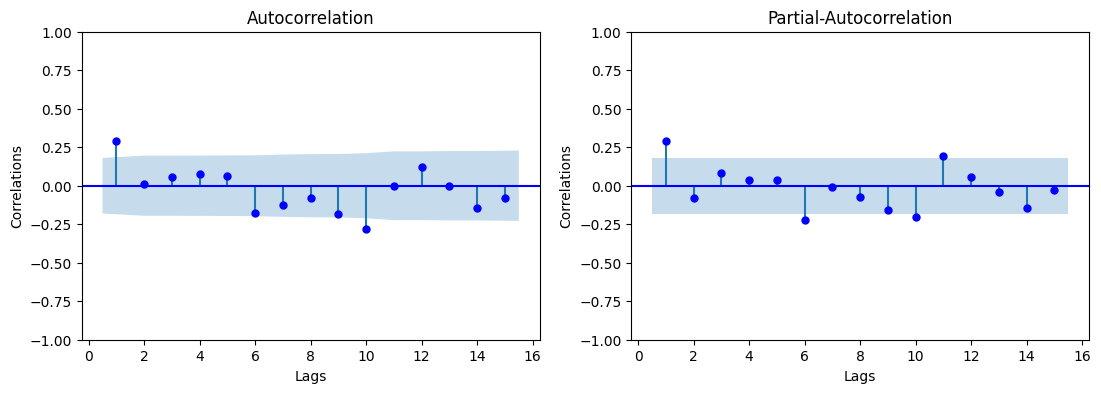

In [5]:
TEA_PRICE_DIFF = DS.take_diff_of_series(TEA_PRICE)
DS.plot_PACF_ACF_together(TEA_PRICE_DIFF[1:], no_lags=15)

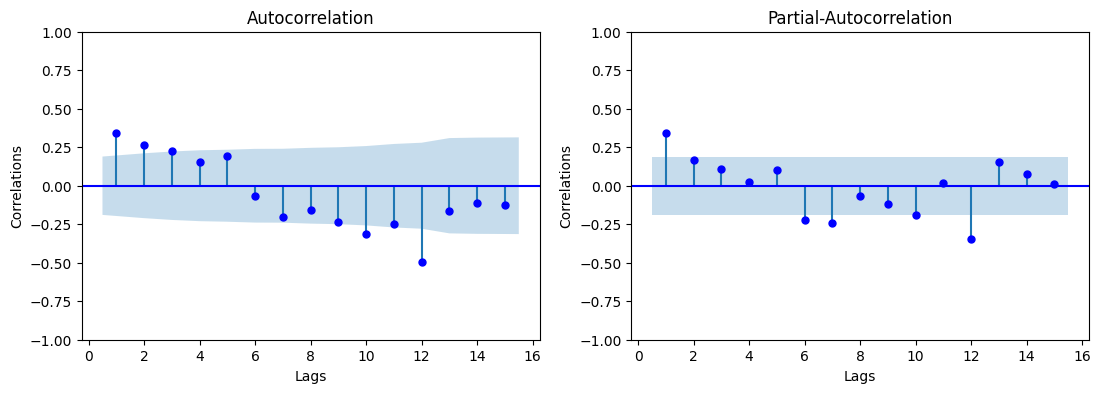

In [6]:
TEA_PRICE_DEASEASON_DIFF= DS.take_diff_of_series(DS.deseasonalize_series(TEA_PRICE, 12)[12:])
DS.plot_PACF_ACF_together(TEA_PRICE_DEASEASON_DIFF, no_lags=15)

### <span style="color:RED">1.c</span>

In [7]:
# MODEL 1 - SARIMA(1, 1, 0)(0, 1, 1, 12)

MODEL1_ORDER = (1, 1, 0)
MODEL1_SEASONAL_ORDER = (0, 1, 1, 12)

SARIMA_MODEL1 = sm.tsa.statespace.SARIMAX(TEA_PRICE, order=MODEL1_ORDER, seasonal_order=MODEL1_SEASONAL_ORDER).fit(disp=False)
print(SARIMA_MODEL1.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  120
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -338.897
Date:                              Fri, 07 Apr 2023   AIC                            683.794
Time:                                      17:55:45   BIC                            691.813
Sample:                                           0   HQIC                           687.045
                                              - 120                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3083      0.091      3.376      0.001       0.129       0.487
ma.S.L12      -0.80

In [8]:
print('The Significance of the Fitted Coefficients for MODEL 1:')
print('\nCoefficent AR at lag 1: ', round(SARIMA_MODEL1.params[0], 3))
print('p-value of AR at lag 1: ', round(SARIMA_MODEL1.pvalues[0], 3))

print('\nCoefficent MA at lag 12: ', round(SARIMA_MODEL1.params[1], 3))
print('p-value of MA at lag 12: ', round(SARIMA_MODEL1.pvalues[1], 3))

The Significance of the Fitted Coefficients for MODEL 1:

Coefficent AR at lag 1:  0.308
p-value of AR at lag 1:  0.001

Coefficent MA at lag 12:  -0.808
p-value of MA at lag 12:  0.0


In [9]:
SARIMA_MODEL1_PREDICTIONS = list(SARIMA_MODEL1.predict())
SARIMA_MODEL1_PREDICTIONS[:14] = [None] * 14

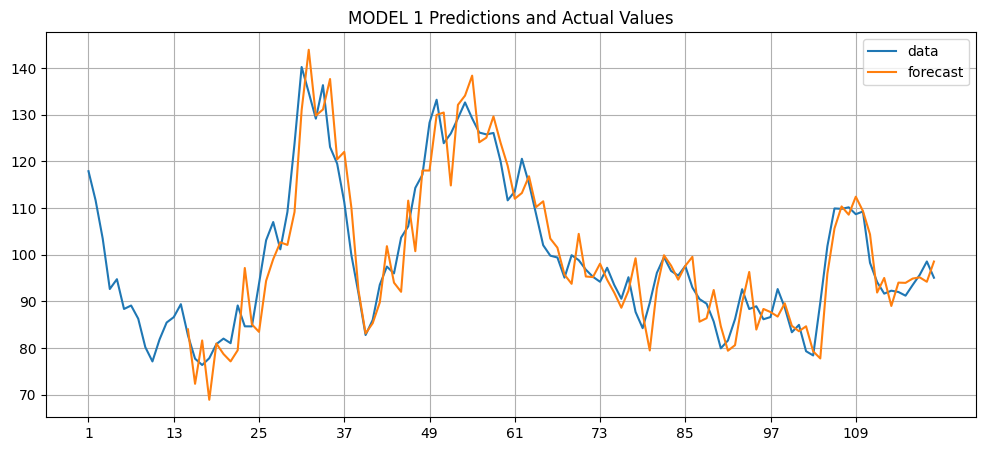

Error Summary
-------------
MAE: 4.5114
MAPE: 4.4886
MSE: 34.1006
RMSE: 5.8396

AIC: 683.7941


In [10]:
DS.plot_forecasts(TEA_PRICE, TEA_MONTHS, SARIMA_MODEL1_PREDICTIONS, time_step=12, title='MODEL 1 Predictions and Actual Values')

DS.print_error_summary(TEA_PRICE, SARIMA_MODEL1_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(SARIMA_MODEL1.aic))

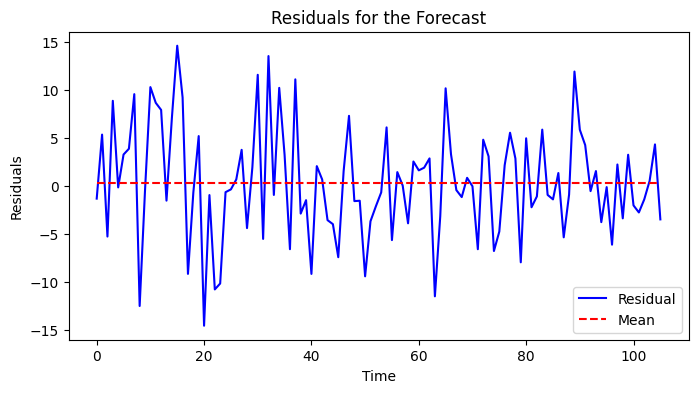

Mean of Residual:   0.3620
S.D. of Residual:   5.8560
Half Width :        1.1278   (degree of freedom = 105, Confidence Level = 0.95)
p-value :           0.5259


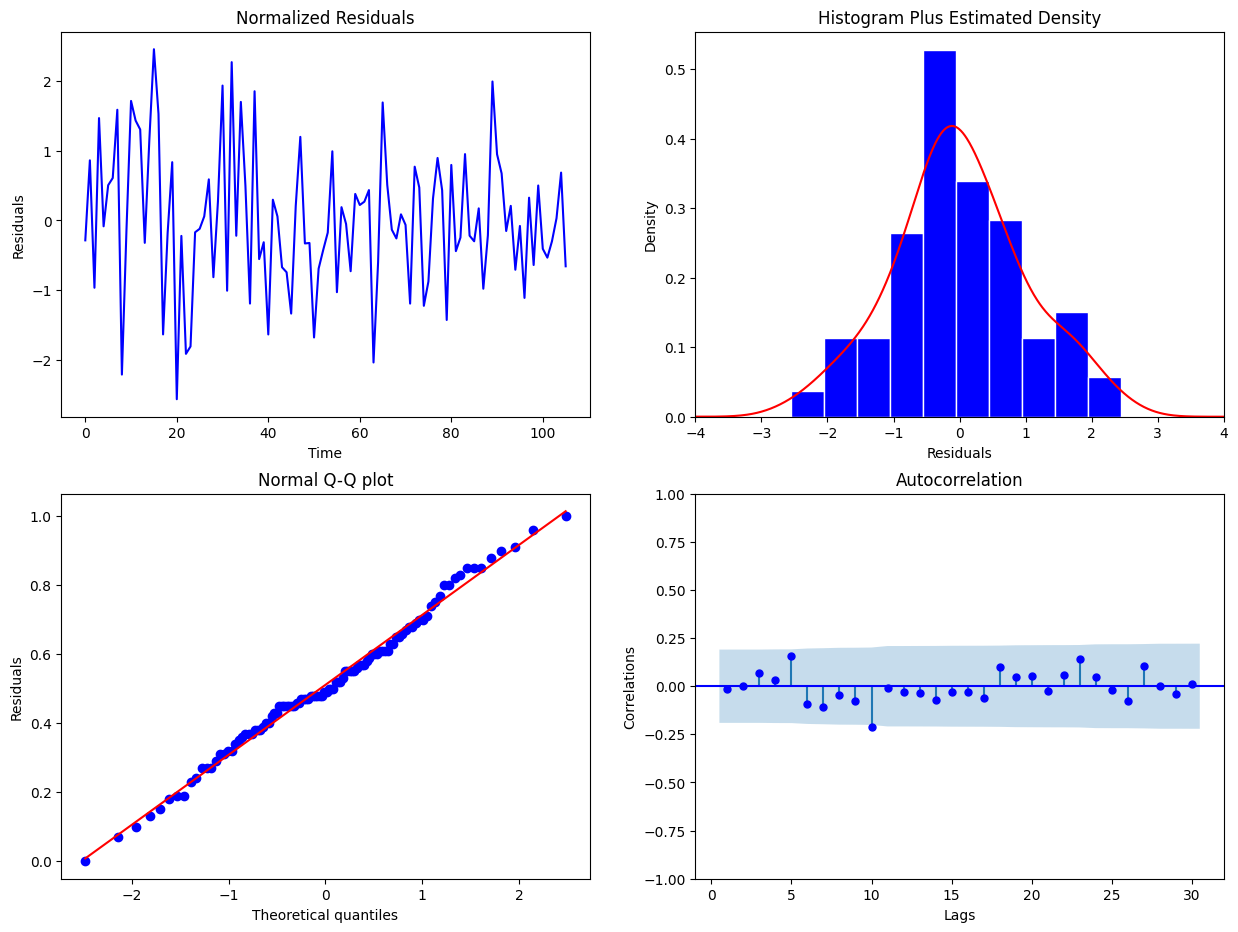

In [11]:
SARIMA_MODEL1_RESIDUALS = DS.get_all_residuals(TEA_PRICE, SARIMA_MODEL1_PREDICTIONS)

DS.plot_resids(SARIMA_MODEL1_RESIDUALS)
DS.print_resids_summary(SARIMA_MODEL1_RESIDUALS)
DS.show_all_normalized_resids_plots(SARIMA_MODEL1_RESIDUALS)

### <span style="color:RED">1.d</span>

In [12]:
# MODEL 2 - SARIMA(1, 0, 1)(1, 1, 0, 12)

MODEL2_ORDER = (1, 0, 1)
MODEL2_SEASONAL_ORDER = (1, 1, 0, 12)

SARIMA_MODEL2 = sm.tsa.statespace.SARIMAX(TEA_PRICE, order=MODEL2_ORDER, seasonal_order=MODEL2_SEASONAL_ORDER).fit(disp=False)
print(SARIMA_MODEL2.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                -350.470
Date:                             Fri, 07 Apr 2023   AIC                            708.940
Time:                                     17:55:48   BIC                            719.668
Sample:                                          0   HQIC                           713.290
                                             - 120                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9164      0.036     25.615      0.000       0.846       0.987
ma.L1          0.2825      

In [13]:
print('The Significance of the Fitted Coefficients:')
print('\nCoefficent AR at lag 1  :', round(SARIMA_MODEL2.params[0], 3))
print('p-value AR at lag 1     :', round(SARIMA_MODEL2.pvalues[0], 3))

print('\nCoefficent MA at lag 1  :', round(SARIMA_MODEL2.params[1], 3))
print('p-value MA at lag 1     :', round(SARIMA_MODEL2.pvalues[1], 3))

print('\nCoefficent AR at lag 12:', round(SARIMA_MODEL2.params[2], 3))
print('p-value AR at lag 12   :', round(SARIMA_MODEL2.pvalues[2], 3))

The Significance of the Fitted Coefficients:

Coefficent AR at lag 1  : 0.916
p-value AR at lag 1     : 0.0

Coefficent MA at lag 1  : 0.282
p-value MA at lag 1     : 0.002

Coefficent AR at lag 12: -0.515
p-value AR at lag 12   : 0.0


In [14]:
SARIMA_MODEL2_PREDICTIONS = list(SARIMA_MODEL2.predict())
SARIMA_MODEL2_PREDICTIONS[:13] = [None] * 13

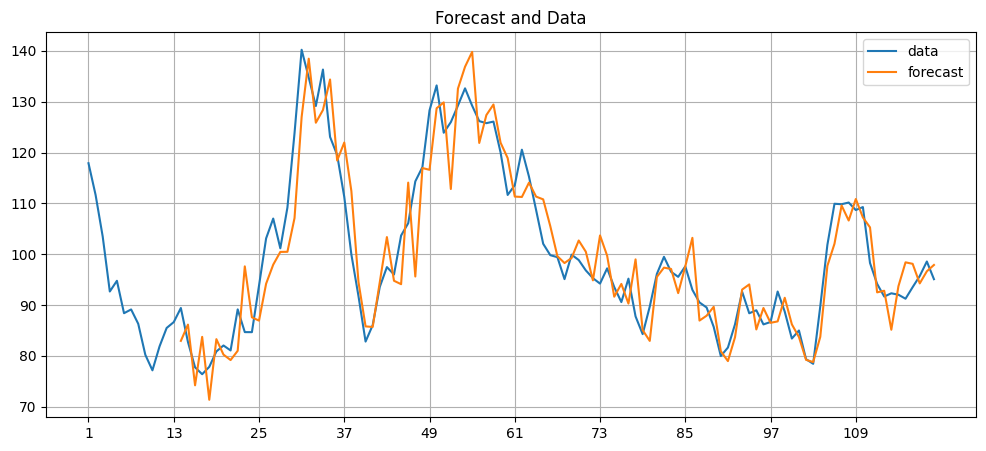

Error Summary
-------------
MAE: 4.6600
MAPE: 4.5684
MSE: 37.0109
RMSE: 6.0837

AIC: 708.9399


In [15]:
DS.plot_forecasts(TEA_PRICE, TEA_MONTHS, SARIMA_MODEL2_PREDICTIONS, time_step=12)

DS.print_error_summary(TEA_PRICE, SARIMA_MODEL2_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(SARIMA_MODEL2.aic))

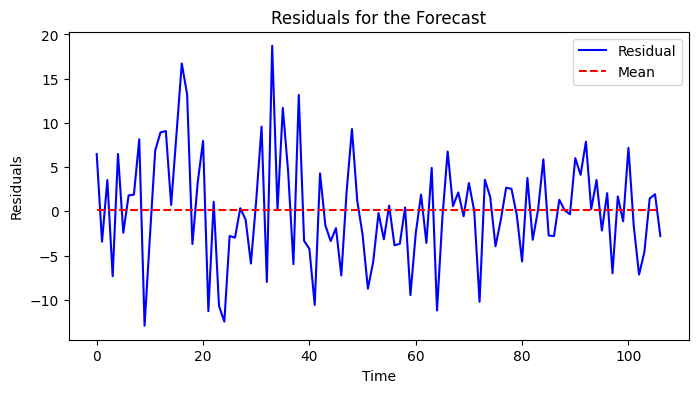

Mean of Residual:   0.1920
S.D. of Residual:   6.1092
Half Width :        1.1709   (degree of freedom = 106, Confidence Level = 0.95)
p-value :           0.7458


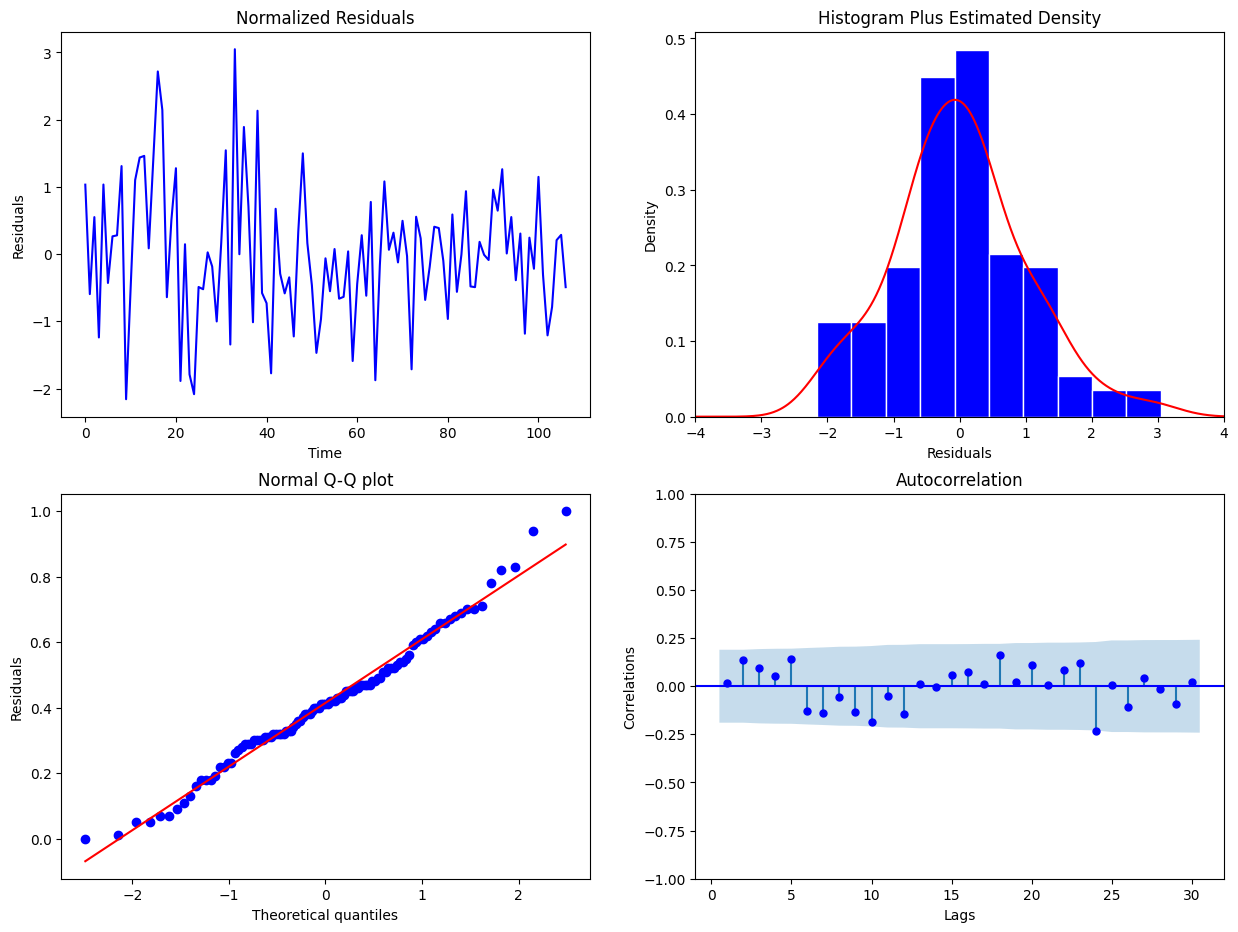

In [16]:
SARIMA_MODEL2_RESIDUALS = DS.get_all_residuals(TEA_PRICE, SARIMA_MODEL2_PREDICTIONS)

DS.plot_resids(SARIMA_MODEL2_RESIDUALS)
DS.print_resids_summary(SARIMA_MODEL2_RESIDUALS)
DS.show_all_normalized_resids_plots(SARIMA_MODEL2_RESIDUALS)

### <span style="color:RED">1.e</span>

In [17]:
TRAIN_START = 0
TRAIN_END = len(TEA_MONTHS)-24

TEST_START = len(TEA_MONTHS)-24
TEST_END = len(TEA_MONTHS)

TEA_PRICE_TRAIN = TEA_PRICE[TRAIN_START:TRAIN_END]
TEA_PRICE_TEST = TEA_PRICE[TEST_START:TEST_END]

TEA_MONTHS_TRAIN = TEA_MONTHS[TRAIN_START:TRAIN_END]
TEA_MONTHS_TEST = TEA_MONTHS[TEST_START:TEST_END]

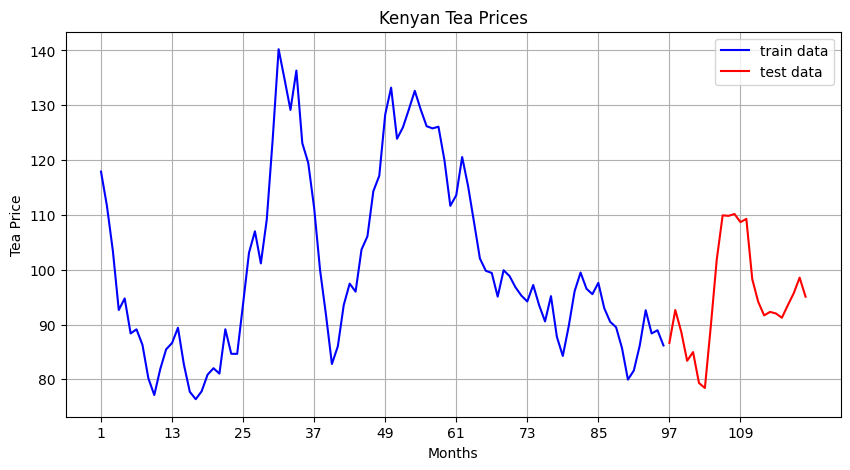

In [18]:
plt.figure(figsize=(10, 5))

plt.plot(TEA_MONTHS_TRAIN, TEA_PRICE_TRAIN, 'b', label='train data')
plt.plot(TEA_MONTHS_TEST, TEA_PRICE_TEST, 'r', label='test data')
plt.xlabel('Months')
plt.ylabel('Tea Price')
plt.grid()
plt.xticks(range(min(TEA_MONTHS), max(TEA_MONTHS)+1, 12))
plt.title('Kenyan Tea Prices')
plt.legend()
plt.show()

In [19]:
### MODEL 1 ###

SARIMA_MODEL1_TRAIN = sm.tsa.statespace.SARIMAX(TEA_PRICE_TRAIN, order=MODEL1_ORDER, seasonal_order=MODEL1_SEASONAL_ORDER).fit(disp=False)

SARIMA_MODEL1_TRAIN_PREDICTIONS = list(SARIMA_MODEL1_TRAIN.predict())
SARIMA_MODEL1_TRAIN_PREDICTIONS[:14] = [None] * 14

In [20]:
SARIMA_MODEL1_SPECS = str('SARIMA' + str(MODEL1_ORDER) + str(MODEL1_SEASONAL_ORDER) + 
                          ' phi_1: ' + str(round(SARIMA_MODEL1_TRAIN.params[0], 4)) +
                          ' theta_12 ' + str(round(SARIMA_MODEL1_TRAIN.params[1], 4)))
SARIMA_MODEL1_SPECS

'SARIMA(1, 1, 0)(0, 1, 1, 12) phi_1: 0.2995 theta_12 -0.8272'

In [21]:
SARIMA_MODEL1_TRAIN_RMSE = DS.RMSE(TEA_PRICE_TRAIN, SARIMA_MODEL1_TRAIN_PREDICTIONS)
SARIMA_MODEL1_TRAIN_MAPE = DS.MAPE(TEA_PRICE_TRAIN, SARIMA_MODEL1_TRAIN_PREDICTIONS)

print('For the Trained Data with MODEL 1 - ' + 'SARIMA' + str(MODEL1_ORDER) + str(MODEL1_SEASONAL_ORDER))
print("RMSE: {:.4f}".format(SARIMA_MODEL1_TRAIN_RMSE))
print("MAPE: %{:.4f}".format(SARIMA_MODEL1_TRAIN_MAPE))

For the Trained Data with MODEL 1 - SARIMA(1, 1, 0)(0, 1, 1, 12)
RMSE: 6.2715
MAPE: %4.8397


In [22]:
SARIMA_MODEL1_TEST = sm.tsa.statespace.SARIMAX(TEA_PRICE, order=MODEL1_ORDER, seasonal_order=MODEL1_SEASONAL_ORDER).filter(SARIMA_MODEL1_TRAIN.params)

SARIMA_MODEL1_TEST_PREDICTIONS = list(SARIMA_MODEL1_TEST.predict())[TEST_START:TEST_END]

In [23]:
SARIMA_MODEL1_TEST_RMSE = DS.RMSE(TEA_PRICE_TEST, SARIMA_MODEL1_TEST_PREDICTIONS)
SARIMA_MODEL1_TEST_MAPE = DS.MAPE(TEA_PRICE_TEST, SARIMA_MODEL1_TEST_PREDICTIONS)

print('For the Test Data trained with MODEL 1 - ' + 'SARIMA' + str(MODEL1_ORDER) + str(MODEL1_SEASONAL_ORDER))
print("RMSE: {:.4f}".format(SARIMA_MODEL1_TEST_RMSE))
print("MAPE: %{:.4f}".format(SARIMA_MODEL1_TEST_MAPE))

For the Test Data trained with MODEL 1 - SARIMA(1, 1, 0)(0, 1, 1, 12)
RMSE: 4.0591
MAPE: %3.2747


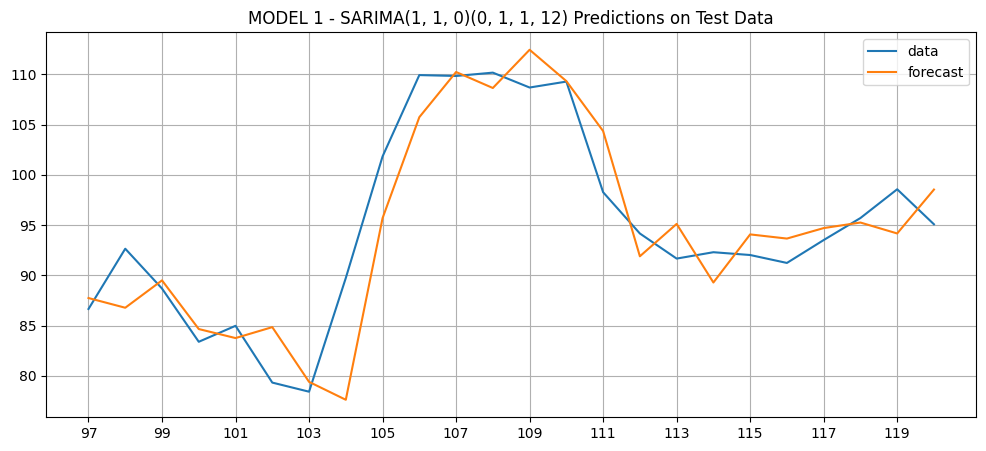

Error Summary
-------------
MAE: 3.0705
MAPE: 3.2747
MSE: 16.4762
RMSE: 4.0591


In [24]:
DS.plot_forecasts(TEA_PRICE_TEST, TEA_MONTHS_TEST, SARIMA_MODEL1_TEST_PREDICTIONS, time_step=2, title='MODEL 1 - SARIMA' + str(MODEL1_ORDER) + str(MODEL1_SEASONAL_ORDER) + ' Predictions on Test Data')

DS.print_error_summary(TEA_PRICE_TEST, SARIMA_MODEL1_TEST_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

In [25]:
### MODEL 2 ###

SARIMA_MODEL2_TRAIN = sm.tsa.statespace.SARIMAX(TEA_PRICE_TRAIN, order=MODEL2_ORDER, seasonal_order=MODEL2_SEASONAL_ORDER).fit(disp=False)

SARIMA_MODEL2_TRAIN_PREDICTIONS = list(SARIMA_MODEL2_TRAIN.predict())
SARIMA_MODEL2_TRAIN_PREDICTIONS[:13] = [None] * 13

SARIMA_MODEL2_SPECS = str('SARIMA' + str(MODEL2_ORDER) + str(MODEL2_SEASONAL_ORDER) +
                            ' phi_1: ' + str(round(SARIMA_MODEL2_TRAIN.params[0], 4)) +
                            ' theta_1: ' + str(round(SARIMA_MODEL2_TRAIN.params[1], 4)) +
                            ' phi_12: ' + str(round(SARIMA_MODEL2_TRAIN.params[2], 4)))

SARIMA_MODEL2_SPECS

'SARIMA(1, 0, 1)(1, 1, 0, 12) phi_1: 0.9208 theta_1: 0.276 phi_12: -0.4656'

In [26]:
SARIMA_MODEL2_TRAIN_RMSE = DS.RMSE(TEA_PRICE_TRAIN, SARIMA_MODEL2_TRAIN_PREDICTIONS)
SARIMA_MODEL2_TRAIN_MAPE = DS.MAPE(TEA_PRICE_TRAIN, SARIMA_MODEL2_TRAIN_PREDICTIONS)

print('For the Train Data with MODEL 2 - ' + 'SARIMA' + str(MODEL2_ORDER) + str(MODEL2_SEASONAL_ORDER))
print("RMSE: {:.4f}".format(SARIMA_MODEL2_TRAIN_RMSE))
print("MAPE: %{:.4f}".format(SARIMA_MODEL2_TRAIN_MAPE))

For the Train Data with MODEL 2 - SARIMA(1, 0, 1)(1, 1, 0, 12)
RMSE: 6.5634
MAPE: %4.9529


In [27]:
SARIMA_MODEL2_TEST = sm.tsa.statespace.SARIMAX(TEA_PRICE, order=MODEL2_ORDER, seasonal_order=MODEL2_SEASONAL_ORDER).filter(SARIMA_MODEL2_TRAIN.params)

SARIMA_MODEL2_TEST_PREDICTIONS = list(SARIMA_MODEL2_TEST.predict())[TEST_START:TEST_END]

In [28]:
SARIMA_MODEL2_TEST_RMSE = DS.RMSE(TEA_PRICE_TEST, SARIMA_MODEL2_TEST_PREDICTIONS)
SARIMA_MODEL2_TEST_MAPE = DS.MAPE(TEA_PRICE_TEST, SARIMA_MODEL2_TEST_PREDICTIONS)

print('For the Test Data trained with MODEL 2 - ' + 'SARIMA' + str(MODEL2_ORDER) + str(MODEL2_SEASONAL_ORDER))
print("RMSE: {:.4f}".format(SARIMA_MODEL2_TEST_RMSE))
print("MAPE: %{:.4f}".format(SARIMA_MODEL2_TEST_MAPE))

For the Test Data trained with MODEL 2 - SARIMA(1, 0, 1)(1, 1, 0, 12)
RMSE: 4.1023
MAPE: %3.3684


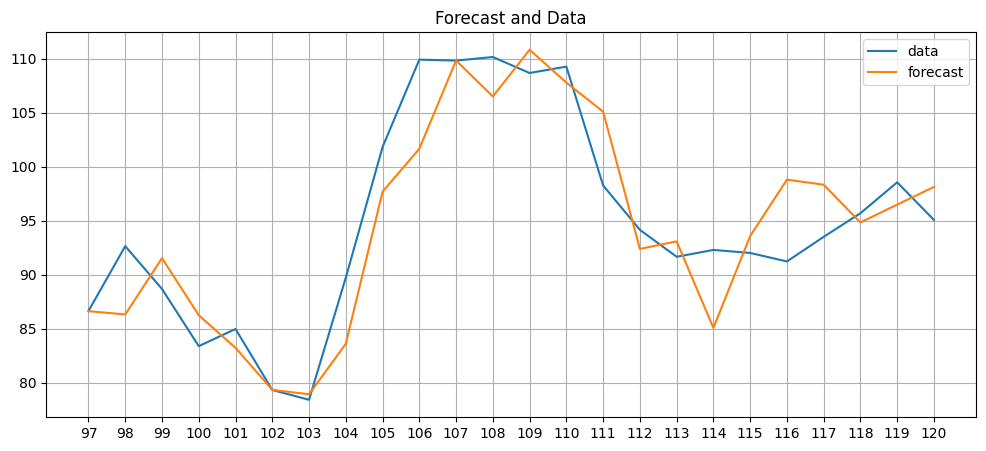

Error Summary
-------------
MAE: 3.2215
MAPE: 3.3684
MSE: 16.8287
RMSE: 4.1023


In [29]:
DS.plot_forecasts(TEA_PRICE_TEST, TEA_MONTHS_TEST, SARIMA_MODEL2_TEST_PREDICTIONS, time_step=1)

DS.print_error_summary(TEA_PRICE_TEST, SARIMA_MODEL2_TEST_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

### <span style="color:RED">1.f</span>

In [30]:
NAIVE_METHOD_TRAIN_PREDICTONS = DS.make_forecast_for_all_data(TEA_PRICE_TRAIN, forecast_method=DS.naive_forecast)

NAIVE_METHOD_TRAIN_RMSE = DS.RMSE(TEA_PRICE_TRAIN, NAIVE_METHOD_TRAIN_PREDICTONS)
NAIVE_METHOD_TRAIN_MAPE = DS.MAPE(TEA_PRICE_TRAIN, NAIVE_METHOD_TRAIN_PREDICTONS)

In [31]:
NAIVE_METHOD_TEST_PREDICTONS = DS.make_forecast_for_all_data(TEA_PRICE_TEST, forecast_method=DS.naive_forecast)

NAIVE_METHOD_TEST_RMSE = DS.RMSE(TEA_PRICE_TEST, NAIVE_METHOD_TEST_PREDICTONS)
NAIVE_METHOD_TEST_MAPE = DS.MAPE(TEA_PRICE_TEST, NAIVE_METHOD_TEST_PREDICTONS)

In [32]:
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_colwidth = 100

QUESTION1_DF = pd.DataFrame({'Method':['Benchmark HW1 (Naive)','Model 1', 'Model 2'],
                             'Spec.' : ['One-Ahead', SARIMA_MODEL1_SPECS, SARIMA_MODEL2_SPECS],
                                'RMSE (Train)': [NAIVE_METHOD_TRAIN_RMSE, SARIMA_MODEL1_TRAIN_RMSE, SARIMA_MODEL2_TRAIN_RMSE],
                                'RMSE (Test)': [NAIVE_METHOD_TEST_RMSE, SARIMA_MODEL1_TEST_RMSE, SARIMA_MODEL2_TEST_RMSE],
                                'MAPE (Train)': [NAIVE_METHOD_TRAIN_MAPE, SARIMA_MODEL1_TRAIN_MAPE, SARIMA_MODEL2_TRAIN_MAPE],
                                'MAPE (Test)': [NAIVE_METHOD_TEST_MAPE, SARIMA_MODEL1_TEST_MAPE, SARIMA_MODEL2_TEST_MAPE]})

In [33]:
QUESTION1_DF

,Method,Spec.,RMSE (Train),RMSE (Test),MAPE (Train),MAPE (Test)
0,Benchmark HW1 (Naive),One-Ahead,5.778,5.245,4.695,4.043
1,Model 1,"SARIMA(1, 1, 0)(0, 1, 1, 12) phi_1: 0.2995 theta_12 -0.8272",6.272,4.059,4.840,3.275
2,Model 2,"SARIMA(1, 0, 1)(1, 1, 0, 12) phi_1: 0.9208 theta_1: 0.276 phi_12: -0.4656",6.563,4.102,4.953,3.368
